# CS4277/CS5477 Lab 0: Getting Started

### Introduction
In this optional assignment, you will get a very short introduction to the following:
- The environment used for the course's exercises: Jupyter notebook.
- Python programming language
- Numpy operations

We expect that many of you will have experience with Python and Numpy, so feel free to skip this tutorial if you are familiar with the concepts. For the rest, this assignment will serve as a quick crash course on the Python programming language, and its use in scientific programming.

This assignment is worth **0%** of the final grade (i.e. completely optional).

### Submission Instructions
Nil. There is no need to submit this assignment.

### Other Useful Resources
This tutorial only covers the very basics. You might also find the following resources useful.

#### Python
- [CS231N Python Numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
- [Official Python 3.5 documentation](https://docs.python.org/3.5/)

#### Numpy
- [Numpy Quickstart Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)

#### OpenCV
- [OpenCV Python Tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
- [OpenCV API Reference](https://docs.opencv.org/3.4.9/)

### Credits
Certain parts of this tutorial is adapted from the excellent [CS231N Python Numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson from Stanford University.

---
## Set up and Starting the Jupyter notebook

### Python Installation
Our assignments are all to be done in Python 3 (>=3.5). So install it if you don't have it yet. **As of time of writing, Python 3.8 has issues working with Jupyter notebook; you are advised to use Python 3.5/3.6/3.7.**

#### Windows
Download the binary from https://www.python.org/downloads/release/python-376/ and install.

#### Mac
Install Python 3 through homebrew: `brew install python3`

#### Ubuntu
Ubuntu 16.04 and above should come with Python 3 pre-installed.


### Install required packages
Install the packages required for this course, which are listed in `requirements.txt`.
For example for pip users:
```
pip install -r requirements.txt
``` 
Advanced users who are using Python for their other projects may wish to consider [virtual environments](https://docs.python.org/3/tutorial/venv.html) to avoid package compatibility issues.

### Starting the Jupyter notebook
Navigate to the directory containing the Jupyter notebook file (.ipynb) in command line, then run:
```
jupyter notebook
```

A browser window that looks like the following should appear:

![](images/screenshot_1.png)

Click on "lab0.ipynb" to start the notebook.

---
## Introduction to Jupyter notebook
For the course, we will use Jupyter notebooks to explain the questions, provide helper code to piece functions together, check your code and visualize results. The Jupyter notebook is a interactive computing environment that enables users to author notebook documents that include live code, narrative text (such as this), equations, etc. 

For example, to print "Hello World", just select the next cell and press the "Run" button on the top. Or press Shift+Enter to execute.

In [1]:
print('hello world')

hello world


The following code verifies that all the required Python packages are installed. You should see a 3d plot and a picture of an otter if everything works.

In [ ]:
%matplotlib inline
import cv2
import k3d
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Plot random 3d points
x = np.random.randn(100,3).astype(np.float32)
colors = k3d.helpers.map_colors((np.sum(x**3-.1*x**2,axis=1)),
                       k3d.colormaps.basic_color_maps.WarmCool,[-2,.1]).astype(np.uint32)
point_size = 0.2
plot = k3d.plot()
plt_points = k3d.points(positions=x, point_size=0.2, colors=colors)
plot += plt_points
plt_points.shader='3d'
plot.display()

# Plot image
im = cv2.imread('images/otter.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR order by default instead of the more usual RGB
plt.imshow(im);

---
## Introduction to Python
### Basic data types¶
We first cover the commonly used basic data types: Integer/floats, booleans, strings.

#### Numbers
Integers and floats are similar to other languages. Unlike C/C++, Python 3 does not discriminate between integers/long integers, or float/double types. Integers in Python 3 are of unlimited size. Floats in Python 3 are implemented as double precision floats on most platforms. However, as we will see later, Numpy does discriminate these types.

In [6]:
i = 4
f = 3.5
print(i, type(i))  # Prints "4 <class 'int'>"
print(f, type(f))  # Prints "3.5 <class 'float'>"

4 <class 'int'>
3.5 <class 'float'>


In [7]:
print(i + 1)   # Addition
print(i - 1)   # Subtraction
print(i * 2)   # Multiplication
print(i ** 3)  # Exponentiation

5
3
8
64


Similar to C/C++, augmented assignments are possible in Python. However note that '++' or '--' do not exist in Python:

In [8]:
i = 2
i += 1    # Equivalent to: i = i + 1
print(i)  # Prints "3"
i *= 2    # Equivalent to: i = i * 2
print(i)  # Prints "6"

3
6


In Python 3, the division operator `/` returns the value in float even when the input is integers. Use double slashes `//` to force integer division.

In [9]:
a = 5/2
print(a, type(a))  # Prints "2.5 <class 'float'>""
b = 5//2
print(b, type(b))  # Print "2 <class 'int'>"". Floating point part is truncated.

2.5 <class 'float'>
2 <class 'int'>


#### Booleans
Boolean operators in Python uses English words rather than symbols (e.g. &&, ||):

In [ ]:
t, f = True, False
print(type(t)) # Prints "<class 'bool'>"

In [ ]:
print(t and f) # Logical AND
print(t or f)  # Logical OR
print(not t)   # Logical NOT

#### Strings

In [11]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
hw = hello + world  # concatenate strings using '+'
print(hw)  # prints "helloworld"
print(len(hello))  # print the length of hello: 5

helloworld
5


String can be formated using the `.format` operator, similar to sprintf in C++. See [here](https://docs.python.org/3/library/string.html) for more details.

In [16]:
str1 = 'String is {} {}.'.format(hello, world)  # new style string formatting.
str2 = 'Numbers are {}, {:.3f}.'.format(24, 1.23456)  # :.3f means print to 3dp
print(str1)  # prints "String is hello world."
print(str2)  # prints "Numbers are: 24, 1.235"

String is hello world.
Numbers are 24, 1.235.


### Containers
Python includes several built-in container types. We only cover lists and dictionaries here.

#### Lists
A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [17]:
mylist = [3, 5, 4]   # Create a list
print(mylist)  # Print entire list
print(mylist[1])  # Print element 1, which is "5" (note python counts from 0)
print(mylist[-1])  # Negative indices count from the end of the list; prints "4"

[3, 5, 4]
5
4


In [18]:
mylist[2] = 'hello'    # Lists can contain elements of different types
print(mylist)

[3, 5, 'hello']


In [19]:
mylist.append('world') # Use .append to add new element to the end
print(mylist)
popped = mylist.pop()  # .pop returns and remove the last element
print(popped, mylist)

[3, 5, 'hello', 'world']
world [3, 5, 'hello']


In addition to accessing list elements one at a time, you can slice Python lists to obtain sublists.

In [20]:
list2 = list(range(4))    # Creates a list containing integers 0 <= i < 4
print(list2)         # Prints "[0, 1, 2, 3]"
print(list2[1:3])    # Get a slice from index 1 to 3 (exclusive); prints "[1, 2]"
print(list2[1:])     # Slicing without the end index will include elements till the end; prints "[1, 2, 3]"
print(list2[:2])     # Excluding start index will start from element 0; prints "[0, 1]"
print(list2[:-1])    # Slice indices can be negative; this will print all but the last element.
list2[2:4] = [100, 101]  # You can assign a list to a slice to modify it
print(list2)         # Prints "[0, 1, 100, 101]"

[0, 1, 2, 3]
[1, 2]
[1, 2, 3]
[0, 1]
[0, 1, 2]
[0, 1, 100, 101]


### Dictionaries

A dictionary stores (key, value) pairs, similar to a Map in Java/C++. You can use it like this:

In [21]:
d = {'cat': 'meow', 'dog': 'woof'}  # Create a new dictionary with some data
print(d['cat'])       # Get the entry corresponding to "cat"; prints "meow"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"
d['sheep'] = 'baaa'    # Set an entry (it will be created if not already present)
print(d['sheep'])      # Prints "baaa"

meow
True
baaa


### Iterations:

Like many languages, for and while loops exist in Python. They iterate over elements from an [iterable](https://docs.python.org/3/glossary.html#term-iterable). In many cases, you can use the [range()](https://docs.python.org/3/library/stdtypes.html#typesseq-range) keyword to create an iterable.

Note that instead of using braces like in C++/Java, Python uses indentation to group statements.

In [22]:
print("Iterate over the items [0,1,2,3].")
for i in range(4):
    print(i)  # note that print(i) is indented by several spaces

print("Iterate over an actual list.")
for i in [0,1,2,3]:
    print(i)

print("While works too")
i = 0
while i < 4:
    print(i)
    i += 1

Iterate over the items [0,1,2,3].
0
1
2
3
Iterate over an actual list.
0
1
2
3
While works too
0
1
2
3


### Functions and Conditionals
Functions are defined using the `def` keyword. As before, indentation is used to group statements.

In [ ]:
def SumPairXY(x, y):
    if (x < 5):
        print("x was < 5")
    elif (x < 10):
        print("5 <= x < 10")
    else:
        print("x was >= 10")
    return x + y

for i in range(4, 11, 2):  # i=4, 6, 8, 10 (start, stop, step)
    print("--- Now running with i: {}".format(i))
    r = SumPairXY(i,i)
    print("Result from SumPairXY: {}".format(r))

---
## Short Introduction to Numpy

We will mainly use Numpy for our assignments. Numpy is the core library for scientific computing in Python. Again, this is only a very brief introduction, and you are encouraged to look at the documentation for further details.

To use Numpy, we first need to import the numpy package:

In [26]:
import numpy as np  # Make numpy available using np.

Numpy's main object is the homogeneous multidimensional array. We can initialize numpy arrays from nested Python lists, and access elements using square brackets:


In [27]:
a = np.array([1, 2, 3])  # Create a 1-dimensional array
print(a)                 # prints [1, 2, 3]
a[0] = 5                 # Change element 0 to 5
print(a)                 # prints [5, 2, 3]

[1 2 3]
[5 2 3]


In [28]:
b = np.array([[1,2,3],[4,5,6]])   # Create a 2-dimensional array (2x3 matrix)
print('b:\n', b)
print('Shape:', b.shape)  # Prints the size of the array, i.e. (2, 3)
print('Elements (0,0), (0,1), (1,0):', b[0, 0], b[0, 1], b[1, 0])

b:
 [[1 2 3]
 [4 5 6]]
Shape: (2, 3)
Elements (0,0), (0,1), (1,0): 1 2 4


Unlike Python lists, elements in a Numpy array have the same data type, which you can check using .dtype attribute. If not explicitly set, it will be determined from the input array.

In [29]:
c = np.array([1, 2, 3])  # no type, will be implicitly set to np.int64
print(c.dtype)
d = np.array([1.0, 2, 3])  # Contains a float, so will be implicitly set to np.float64
print(d.dtype)
e = np.array([1, 2, 3], dtype=np.float64)  # You can set the type through the dtype argument
f = c.astype(np.float32)  # Cast an array into another type
print(e.dtype, f.dtype)

int32
float64
float64 float32


Numpy also provides many functions to create arrays:

In [30]:
a = np.zeros((2,2))  # Create an 2x2 array of all zeros
print('a:\n', a)
b = np.ones((1,2))   # Create an 1x2 array of all ones
print('b:\n', b)
c = np.full((2,2), 5) # Create a constant array containing all 5's
print('c:\n', c)
d = np.eye(2)        # Create a 2x2 identity matrix
print('d:\n', d)

a:
 [[0. 0.]
 [0. 0.]]
b:
 [[1. 1.]]
c:
 [[5 5]
 [5 5]]
d:
 [[1. 0.]
 [0. 1.]]


### Array Indexing
Similiar to Python lists, Numpy offers many ways to index into arrays. For brevity, we only cover the basics. If you want to know more you should read the [documentation](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

<u>Slicing</u>: Similar to Python's list slicing. This is probably the most common way to index an array. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [31]:
# Create the following 2-dimensional array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


<u>Boolean array indexing</u>: Boolean array indexing lets you pick out arbitrary elements of an array using a boolean mask.

In [32]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Retrieves elements of a that are bigger than 2.
                    # This returns a numpy array of Booleans of the same
                    # shape as a, where each element is True if the
                    # corresponding element of a is > 2, False otherwise.
print(bool_idx)


[[False False]
 [ True  True]
 [ True  True]]


In [33]:
# Retrieves elements of a which have a corresponding value of True in bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


### Array Math

In [34]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum, difference, product, and division
print(x + y)
print(x - y)
print(x * y)
print(x / y)

[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


<u>**Important!**</u> Unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. For matrix multiplication (or vector inner dot products), we use the dot function. dot is available both as a function in the numpy module and as an instance method of array objects. Alternatively you can use the `@` operator.

In [35]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# Matrix-matrix product; all the following are equivalent
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


### Useful functions on arrays

Numpy provides many useful functions for performing computations on arrays, such as the sum:

In [36]:
x = np.array([[1,2],
              [3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


Besides the sum, many other common operations are available, such as computing the mean/min/max of an array. Many of these operations also accept an `axis` argument similar to np.sum().

In [37]:
print("Showing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Mean: {}".format(np.mean(b)))
print("Max index: {}".format(np.argmax(b)))  # position of max element

Showing some basic math on arrays
Max: 4
Mean: 2.0
Max index: 2


Other important functions which you will likely use include transpose and inverse:

In [38]:
x = np.array([[1,2],[3,4]])
print(x)
print(x.T)  # .T tranposes the matrix
print(x.transpose())  # .transpose() does the same thing
print(np.linalg.inv(x))  # Inverse of the matrix

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In computer vision, the singular value decomposition is an important operation, which can also be found in Numpy.

In [39]:
u, s, v_t = np.linalg.svd(x)
print('u:\n', u)
print('s:\n', np.diag(s))
print('v_t:\n', v_t)  # v_transpose

# Should give you the original matrix
# [[1,2],
#  [3,4]]
print(u @ np.diag(s) @ v_t)

u:
 [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
s:
 [[5.4649857  0.        ]
 [0.         0.36596619]]
v_t:
 [[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]
[[1. 2.]
 [3. 4.]]


### Broadcasting
In all of the examples above, the matrices have compatible shapes. Under certain conditions, it is possible to perform arithmetic operations on numpy arrays with different shapes. The smaller array is "broadcast" across the larger array so that they have compatible shapes.

In general, two dimensions are compatible when:
1. They are equal, or
2. One of them is one.

For example, say we have a matrix $A$, and we want to add the elements of $b$ row-wise to $A$, i.e. add 1 to first row, 2 to the second, and 4 to the third. We could do it using a for loop like this:

In [40]:
A = np.array([[1, 2, 3],   # Shape of A: (3, 3)
              [4, 5, 6],
              [7, 8, 9]])  
b = np.array([1, 2, 4])    # Shape of b: (3,)
result = np.empty_like(A)  # Empty unitialized matrix the same size of A

for i in range(3):
    result[i, :] = A[i, :] + b[i]
    
print(result)

[[ 2  3  4]
 [ 6  7  8]
 [11 12 13]]


However, for large matrices, an explicit loop can be slow. Another way is to tile/repeat b such that it has the same shape as A then add them:

In [41]:
b_2d = b[:, None]  # Reshapes b to (3, 1)
b_tile = np.tile(b_2d, (1, 3))  # "repeats" the matrix 3x such that it's 3x3

result = A + b_tile
print(result)

[[ 2  3  4]
 [ 6  7  8]
 [11 12 13]]


This works, but is memory inefficient since `b_tile` has to be stored in memory. Numpy broadcasting allows us to perform this without actually explicitly creating the copies of $b$:

In [42]:
print(A + b_2d)

[[ 2  3  4]
 [ 6  7  8]
 [11 12 13]]


This works because the dimensions are compatible with broadcasting, as shown below:

```
A      (2d array): 3 x 3
b_2d   (2d array): 3 x 1
Result (2d array): 3 x 3
```

The smaller `b_2d` is implicitly repeated to shape of $(3,3)$ before the element wise addition. For more examples, do refer to the numpy broadcast [documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

## Introduction to OpenCV
We use OpenCV for the various computer vision operations, and also to load images. We will cover a few useful functions here; you do not need in-depth knowledge of OpenCV as you will be implementing most of the functions yourself.

As with Numpy, you'll first need to import the OpenCV package:

In [43]:
import cv2

### Loading images
Image loading is accomplished using `cv2.imread()`. This function allows you to load various image types, e.g. .png, .jpg. Note that OpenCV's typically uses the BGR (blue-green-red) order for color channels, which we will often change to RGB for compatibility with other libraries.

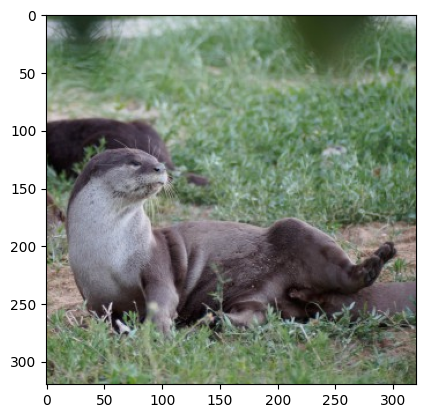

In [47]:
im = cv2.imread('images/otter.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  # converts to RGB

# Displays the image using Matplotlib's pyplot.
plt.imshow(im);

The image is stored as a Numpy array (size $height \times width \times channels$), of type uint8 (unsigned char):

In [48]:
print(type(im), im.dtype)

<class 'numpy.ndarray'> uint8


This means you can manipulate the image using standard Numpy operations. For example, we set certain pixels to black (zero) here:

In [ ]:
im[250:, 0:50, :] = 0  # Note that the array dimensions are y,x,channel (i.e. the vertical coordinate comes first)
plt.imshow(im);

OpenCV provides useful drawing functions which can help with debugging:

In [ ]:
# Draws a red circle on the image, at x=100,y=50. Radius=5.
cv2.circle(im, (100, 50), 5, (255, 0, 0), thickness=2)
# Draws a blue line from (200,300) to (250,0
cv2.line(im, (200, 300), (250, 0), (0, 0, 255), thickness=2)
plt.imshow(im);